# `GeoPandas` for spatial data management

[GeoPandas](http://geopandas.org/) is an extension of Pandas. A `GeoDataFrame` is just like a normal DataFrame, except each record has a [`shapely`](https://shapely.readthedocs.io/en/stable/manual.html) geometry attached. This geometry can be a point, a line, or a polygon.

GeoDataFrames can easily be saved as SHP or GeoJSON.

## `shapely` for geometries

`geopandas` uses `shapely` for 2D geometry processing and analysis.

If you ever need to handle 2D geometric relationships, this library will save you a lot of time. It implements a lot of trickt maths, and is also very fast.

[Read the docs.](https://shapely.readthedocs.io/en/stable/manual.html)

The main objects are Points, Lines (called LineStrings) and Polygons. Each object also has a 'Multi' version which is a collection of those objects. 

We'll start by making a small collection of Points:

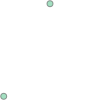

In [1]:
from shapely.geometry import Point, MultiPoint

p = Point(0.0, 0.0)
q = Point(1.0, 2.0)

MultiPoint([p, q])  # A collection of points.

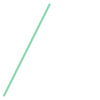

In [12]:
from shapely.geometry import LineString

L = LineString([p, q])
L

In [13]:
L.length

2.23606797749979

In [14]:
L2 = LineString([(1, 0), (0, 2)])

In [15]:
tuple(L.intersection(L2).coords)

((0.5, 1.0),)

In [16]:
tuple(LineString([p, q]).interpolate(0.4).coords)

((0.17888543819998318, 0.35777087639996635),)

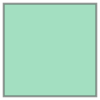

In [17]:
from shapely.geometry import box, Polygon

x = box(-1, -1, 3, 3)  # minx, miny, maxx, maxy
x

In [18]:
x.contains(p)

True

### EXERCISE

Create two LineString objects:

- Line 1 points: (0, 0), (1, 1), (0, 2), (1, 3), (0, 4)
- Line 2 points: (0, -1), (1, 5)

At how many points do these lines intersect?

In [19]:
# YOUR CODE HERE


In [20]:
a = LineString([(0, 0), (1, 1), (0, 2), (1, 3), (0, 4)])
b = LineString([(0, -1), (1, 5)])

len(a.intersection(b))

4

In [26]:
# We can turn things into arrays if needed:
import numpy as np

np.array(a)

array([[0., 0.],
       [1., 1.],
       [0., 2.],
       [1., 3.],
       [0., 4.]])

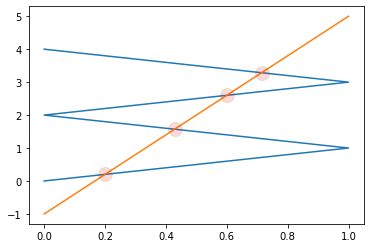

In [45]:
# So plotting is fairly easy:
import matplotlib.pyplot as plt

plt.plot(*np.array(a).T)
plt.plot(*np.array(b).T)
plt.plot(*np.array(a.intersection(b)).T, 'o', ms=14, mfc=(1, 0, 0, 0.15))

## Read a shapefile

We'll use this dataset: https://geocomp.s3.amazonaws.com/data/Offshore_wells.geojson

This was generated from a shapefile that was written by QGIS.

In [37]:
import geopandas as gpd

gdf = gpd.read_file('https://geocomp.s3.amazonaws.com/data/Offshore_wells.geojson')

gdf.head()

,Company,D__,Drilling_U,RT_Elevati,Spud_Date,Total_De_1,Total_Dept,Water_Dept,Well_Nam_1,Well_Name,Well_No_,Well_Symb,Well_Termi,Well_Type,seafl_twt_,geometry
0,Mobil et al,1.0,Bawden Rig 18,8.2,1967-06-07,15106.0,4604.0,3.9,C-67,Sable Island,1.0,Plugged dry hole,1968-01-02,Exploratory,5.252525,POINT (-59.91627 43.93476)
1,Shell,2.0,Sedneth 1,25.9,1969-09-01,13085.0,3988.0,57.9,E-84,Onondaga,2.0,Plugged gas well,1969-11-11,Exploratory,77.979798,POINT (-60.22067 43.72122)
2,Shell,3.0,Sedneth 1,25.9,1969-11-16,13516.0,4120.0,82.3,O-25,Oneida,3.0,Plugged dry hole,1970-02-10,Exploratory,110.841751,POINT (-61.55940 43.24934)
3,Shell,4.0,Sedneth 1,26.0,1970-02-16,7235.0,2205.0,95.1,N-30,Naskapi,4.0,Plugged dry hole,1970-03-19,Exploratory,128.080808,POINT (-62.56584 43.49640)
4,Shell,5.0,Sedco H,31.4,1970-05-03,6975.0,2126.0,117.0,B-93,Mohawk,5.0,Plugged dry hole,1970-05-23,Exploratory,157.575758,POINT (-64.73084 42.70305)


<AxesSubplot:>

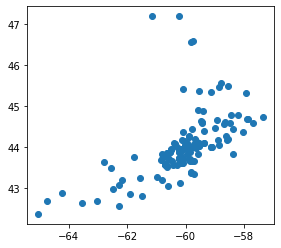

In [38]:
gdf.plot()

The CRS is stored with [an EPSG code](https://spatialreference.org/ref/epsg/).

This one is WGS84:

In [ ]:
gdf.crs

## Data analysis

Let's look at the data in this GeoDataFrame:

In [ ]:
gdf.describe()

In [ ]:
# Build this up.
gdf['Total_Dept'].hist(bins=20)

Let's look at companies:

In [ ]:
gdf['Company'].value_counts()

Notice how many typos and repeats there are! We could find all the occurrences of `"Pex-Tex"` and `"Pex/Tex"`:

In [ ]:
gdf.loc[gdf['Company'].str.count('Pex-Tex|Pex/Tex') > 0]

Before we go much further, it's going to be advantageous to convert dates to `datetime` objects — right now they are strings:

In [ ]:
gdf.loc[0, 'Spud_Date']

In [66]:
import pandas as pd

gdf['Spud_Date'] = pd.to_datetime(gdf['Spud_Date'])
gdf['Well_Termi'] = pd.to_datetime(gdf['Well_Termi'])
gdf.loc[0, 'Spud_Date']

Timestamp('1967-06-07 00:00:00')

In [58]:
# In case it comes up!
import pandas as pd

# These all parse.
dates = [
    '27th Aug 1992',
    '1969-05-05',
    '2:33 pm, 3rd Sept 2001',
    '04-MAY-19',
]

for date in dates:
    print(pd.to_datetime(date))
    
# If the dates are silly, you'll need a format string.
datecol = ['2021-03-03', '2021-21-03']
print(pd.to_datetime(datecol, format="%Y-%d-%m"))

1992-08-27 00:00:00
1969-05-05 00:00:00
2001-09-03 14:33:00
2019-05-04 00:00:00
DatetimeIndex(['2021-03-03', '2021-03-21'], dtype='datetime64[ns]', freq=None)


### EXERCISE

What's the TD of the first well drilled after the year 2000 in more than 200 m of water?

In [ ]:
# YOUR CODE HERE



In [71]:
gdf.loc[gdf['Spud_Date'] > 'Nov, 2005']  # This is pretty cool.

,Company,D__,Drilling_U,RT_Elevati,Spud_Date,Total_De_1,Total_Dept,Water_Dept,Well_Nam_1,Well_Name,Well_No_,Well_Symb,Well_Termi,Well_Type,seafl_twt_,geometry
201,Encana-Marauder,398.0,Rowan Gorilla VI,47.50,2005-11-18,12139.00,3700.0,29.5,J-14,Dominion,202.0,Plugged dry hole,2006-01-30,Exploration,39.730640,POINT (-60.53097 43.89266)
202,ExxonMobil,399.0,Galaxy II,56.70,2006-02-08,11089.00,3380.0,66.6,N-76,Alma 3,203.0,Gas well,2006-04-11,Development,89.696970,POINT (-60.68860 43.59638)
203,Encana-Marauder,400.0,Rowan Gorilla VI,47.50,2005-12-30,14567.00,4440.0,29.5,J-14A,Dominion,204.0,Plugged dry hole,2006-01-24,Exploration,39.730640,POINT (-60.53097 43.89266)
204,EnCana,402.0,Rowan Gorilla III,43.80,2010-01-12,8330.00,2539.0,41.6,E-70,Margaree,206.0,Injection well,2010-03-31,Development,56.026936,POINT (-60.67152 43.82144)
205,ExxonMobil,401.0,Rowan Gorilla III,49.73,2009-06-08,13074.10,3985.0,66.6,N-76,Alma 4,205.0,Gas well,2009-08-14,Development,89.696970,POINT (-60.68863 43.59636)
206,ExxonMobil,403.0,Rowan Gorilla III,40.90,2009-08-08,14202.75,4329.0,66.6,N-76,Alma 4A,207.0,Gas well,2009-10-05,Development,89.696970,POINT (-60.68863 43.59636)


In [59]:
wells = gdf.loc[(gdf['Water_Dept'] > 200) & (gdf['Spud_Date'] > '2000')]

# -- OR, probably better... --
deep = gdf['Water_Dept'] > 200
late = gdf['Spud_Date'] > '2000'  # Must be str, or pd.to_datetime('2000')
wells = gdf.loc[deep & late]      # Cute.
# ----------------------------

wells.head()

,Company,D__,Drilling_U,RT_Elevati,Spud_Date,Total_De_1,Total_Dept,Water_Dept,Well_Nam_1,Well_Name,Well_No_,Well_Symb,Well_Termi,Well_Type,seafl_twt_,geometry
179,Marathon Cda,374.0,West Navion,35.5,2001-12-26,11470.0,3496.0,1737.0,B-24,Annapolis,180.0,Plugged gas show,2002-04-24,Exploration,2339.393939,POINT (-59.80980 43.38560)
182,Chevron Cda,377.0,Deepwater Millennium,24.0,2002-05-22,19915.0,6070.0,977.0,H-23,Newburn,183.0,Plugged gas show,2002-08-21,Exploration,1315.824916,POINT (-60.80513 43.20464)
183,Marathon Cda,378.0,West Navion,35.5,2002-04-17,20282.0,6182.0,1711.0,G-24,Annapolis,184.0,Plugged gas well,2002-08-16,Exploration,2304.377104,POINT (-59.80732 43.38978)
187,EnCana Corp.,383.0,Eirik Raude,25.0,2002-11-16,11811.0,3600.0,1674.5,C-15,Torbrook,188.0,Plugged dry hole,2003-01-14,Exploration,2255.218855,POINT (-62.29259 42.56751)
192,Imperial Oil,388.0,Eirik Raude,25.0,2003-07-06,15584.0,4750.0,1803.0,B-79,Balvenie,193.0,Plugged dry hole,2003-09-06,Exploration,2428.282828,POINT (-60.18167 43.13377)


In [87]:
# Series.argmin() and Series.idxmin() don't work on dates.
# So this is the best I can come up with:

sd = wells['Spud_Date']
wells.loc[sd==sd.min(), 'Total_Dept']

179    3496.0
Name: Total_Dept, dtype: float64

## Define a polygon

We have a polygon, but it is in UTM coordinates. We'll have to deal with that.

### EXERCISE

Define a `shapely.Polygon` with the following vertices: 

| Point |   UTMx    |     UTMy    |
|:-----:|-----------|-------------|
|   1   | 700,000 m | 4,950,000 m |
|   2   | 700,000 m | 4,800,000 m |
|   3   | 800,000 m | 4,800,000 m |
|   4   | 800,000 m | 4,950,000 m |


In [ ]:
from shapely.geometry import Polygon

# YOUR CODE HERE


In [89]:
from shapely.geometry import Polygon

poly = Polygon([
    (700_000, 4_950_000),
    (700_000, 4_800_000),
    (800_000, 4_800_000),
    (800_000, 4_950_000),
])

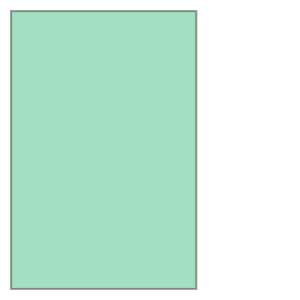

In [90]:
poly

### EXERCISE 

The CRS for these coordinates is given as:

> NAD83-CSRS-UTM20N

**CSRS** refers to the Canadian Spatial Reference System, a 3D, space-based update of the original ground-based geodetic NAD83 datum. [Read about it.](https://www.nrcan.gc.ca/maps-tools-and-publications/tools/geodetic-reference-systems/canadian-spatial-reference-system-csrs/9052)

Can you find the EPSG code for this datum, and use it to create a `GeoDataFrame`?

You can look up the EPSG code here: https://spatialreference.org/ref/epsg/

In [ ]:
# YOUR CODE HERE

gpoly = gpd.GeoDataFrame( ... )

In [102]:
data = {'name': ['Area A'],  # These have to be lists of things (or pass an index like [0] to the constructor.)
        'geometry': [poly],
       }

gpoly = gpd.GeoDataFrame(data, crs="epsg:2961")

gpoly

,name,geometry
0,Area A,"POLYGON ((700000.000 4950000.000, 700000.000 4..."


Now we can convert the dataframe to any other CRS. We'll convert it to match the well data:

In [103]:
gpoly = gpoly.to_crs(gdf.crs)
gpoly

,name,geometry
0,Area A,"POLYGON ((-60.47663 44.67550, -60.53321 43.326..."


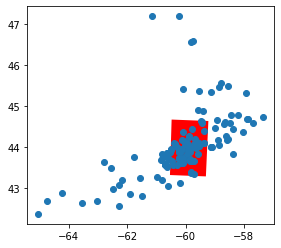

In [104]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax = gpoly.plot(ax=ax, color='r', aspect=1)
ax = gdf.plot(ax=ax)

## Intersect wells and polygon

We can intersect the well dataframe `df` with the Shapely polygon:

In [105]:
gdf.sindex.query_bulk(gpoly.geometry)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [197, 183, 117,  91,  32,  78, 198, 186, 199,  95, 105,  98,  75,
         81,  87, 153, 156, 158, 155, 154, 181, 200,  73,  72,  71, 195,
         82,  38,  80,  48,  85,   8,  20,   7,   6,  59,  50, 106, 116,
        123, 161, 176, 163, 160, 164, 162, 203, 201,  68,  34,   0,  70,
        174,  28,  26, 152,  46,  45,  36,  33,  37,  43,  66, 110, 170,
        185, 184,  96, 108,  63,  65,   9,  13,  94, 179, 177,  62,  99,
        102,  83, 188,

In [106]:
poly, well = gdf.sindex.query_bulk(gpoly.geometry)

In [116]:
gdw = gdf.loc[well]

## Write a shapefile

In [120]:
# Can't put data times in Shapefiles apparently.
gdw['Spud_Date'] = gdw['Spud_Date'].apply(str)
gdw['Well_Termi'] = gdw['Well_Termi'].apply(str)

In [131]:
gdw.to_file('../data/Wells_in_polygon')  # Makes a folder.
gdw.to_file('../data/Wells_in_polygon.geojson', driver='GeoJSON')

In [136]:
# Not for class, just to keep our repo tidy.
!rm -rf ../data/Wells_in_polygon.*
!rm ../data/Wells_in_polygon.geojson

rm: ../data/Wells_in_polygon.geojson: No such file or directory


---

© Agile Scientific - code licenced Apache 2.0